## Determine loss incurred for defaulted loans

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
data=pd.read_csv('train_v2.csv')
data.head(5)

C:\Users\91954\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [8]:
data["default"]=np.where(data["loss"]>0,1,0)
data.shape

(105471, 772)

In [9]:
len(data[data["default"]==1]),len(data[data["default"]==0])

(9783, 95688)

In [10]:
# Dataset for defaulters
d1=data[data["default"]==1]

In [11]:
d1.shape

(9783, 772)

In [15]:
d1=d1.iloc[:,1:771]
d1.head(5)

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
7,9,0.385778,2900,4,79244,6597.0,3592.0,127.19,127.89,6,...,17,4.45,-3.26,2.56,0.2947,-0.7220,0,0,5,1
16,9,0.437883,1300,3,11255,3679.0,2969.0,129.74,130.00,14,...,54,19.33,-14.17,10.84,0.2740,0.7246,0,0,5,16
26,9,0.197708,1800,4,14694,2040.0,167.0,129.86,126.31,14,...,27,10.03,-7.64,6.06,0.2896,0.6349,0,0,5,19
50,9,0.451065,2200,4,8563,631.0,2547.0,125.07,122.61,13,...,4,1.58,-1.04,0.72,0.1295,1.1789,0,0,5,4
64,10,0.829348,3800,4,78149,105.0,2724.0,142.82,150.53,15,...,4,1.15,-0.72,0.45,0.2286,0.9470,0,0,5,11


In [17]:
cat=d1.select_dtypes(include=['object'])
num=d1.select_dtypes(exclude=["object"])

In [19]:
for c in cat.columns:
    cat[c] = pd.to_numeric(cat[c],errors='coerce')

<ipython-input-19-246641a70a91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[c] = pd.to_numeric(cat[c],errors='coerce')


In [22]:
cat.f419=cat.f419.astype(np.int64)
cat.dtypes

C:\Users\91954\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


f137    float64
f138    float64
f206    float64
f207    float64
f276    float64
f277    float64
f338    float64
f390    float64
f391    float64
f419      int64
f420    float64
f469    float64
f472    float64
f534    float64
f537    float64
f626    float64
f627    float64
f695    float64
f698    float64
dtype: object

In [376]:
df=pd.concat([cat,num],axis=1)
df.head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
7,9.210000e+16,1.887496e+22,2.730000e+14,1.202379e+19,2.410000e+16,3.620247e+21,4.490000e+14,4.087981e+29,1.335403e+39,13100000000000,...,17,4.45,-3.26,2.56,0.2947,-0.7220,0,0,5,1
16,3.120000e+15,2.365950e+20,1.930000e+13,4.670000e+17,6.920000e+14,2.810321e+19,4.600000e+17,3.089230e+29,5.847734e+38,6520000000000000,...,54,19.33,-14.17,10.84,0.2740,0.7246,0,0,5,16
26,1.420000e+14,4.030000e+18,3.760000e+12,3.090000e+16,9.820000e+11,5.560000e+15,1.320000e+14,1.893698e+29,3.995662e+38,8270000000000,...,27,10.03,-7.64,6.06,0.2896,0.6349,0,0,5,19
50,1.910000e+13,2.210000e+17,2.360000e+13,6.630000e+17,1.490000e+16,2.617391e+21,1.290000e+11,6.666869e+28,1.883021e+38,2503078353,...,4,1.58,-1.04,0.72,0.1295,1.1789,0,0,5,4
64,3.600000e+11,1.170000e+15,3.069081e+08,1.550000e+11,5.110000e+17,2.850045e+23,1.825881e+10,1.137907e+29,3.531949e+38,318336746,...,4,1.15,-0.72,0.45,0.2286,0.9470,0,0,5,11


In [377]:
null=pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
null=null[null['Count'] > 0]
null

,Count,Percent
f137,6,0.061331
f138,6,0.061331
f206,99,1.011960
f207,99,1.011960
f276,7,0.071553
...,...,...
f761,9,0.091996
f762,9,0.091996
f763,127,1.298170
f774,94,0.960850


In [378]:
df.fillna(df.mean(),inplace=True)

In [379]:
df.isnull().sum()

f137    0
f138    0
f206    0
f207    0
f276    0
       ..
f775    0
f776    0
f777    0
f778    0
loss    0
Length: 769, dtype: int64

In [380]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [381]:
num_summary=df.apply(lambda x: var_summary(x))
num_summary

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
N,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,9.783000e+03,...,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9.783000e+03,9783.000000
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,4.413301e+21,7.075438e+27,3.689310e+21,7.168767e+27,4.054676e+21,6.824684e+27,1.650844e+24,1.072554e+34,7.304229e+43,-1.292967e+18,...,159067.000000,56452.980000,-41773.730000,32417.630000,2302.956468,893.283008,3096.000000,3055.000000,1.771290e+06,84333.000000
MEAN,4.511194e+17,7.232381e+23,3.771144e+17,7.327780e+23,4.144615e+17,6.976065e+23,1.687462e+20,1.096345e+30,7.466246e+39,5.524611e+15,...,16.259532,5.770518,-4.270033,3.313670,0.235404,0.091310,0.316467,0.312276,1.810580e+02,8.620362
MEDIAN,8.750000e+14,4.735541e+19,7.820000e+11,4.350000e+15,5.680000e+14,2.464837e+19,1.490000e+14,1.698253e+29,4.042749e+38,1.440000e+12,...,10.000000,3.820000,-2.850000,2.210000,0.251600,0.488500,0.000000,0.000000,4.000000e+01,5.000000
STD,3.607979e+18,6.526066e+24,3.759466e+18,7.807243e+24,3.781603e+18,7.750761e+24,7.886869e+21,2.608456e+30,2.265671e+40,2.375330e+17,...,16.723698,5.918641,4.399394,3.436340,0.072300,1.121639,0.465121,0.463446,3.014597e+02,11.571447
VAR,1.301751e+37,4.258954e+49,1.413358e+37,6.095305e+49,1.430052e+37,6.007430e+49,6.220271e+43,6.804045e+60,5.133265e+80,5.642191e+34,...,279.682074,35.030311,19.354668,11.808433,0.005227,1.258073,0.216338,0.214782,9.087797e+04,133.898387
MIN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.909150e+26,2.277786e+35,-8.636744e+18,...,2.000000,0.000000,-38.010000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000e+00,1.000000
P1,7.957656e+09,1.434600e+13,0.000000e+00,0.000000e+00,5.999209e+10,1.596400e+14,0.000000e+00,2.552332e+27,2.756117e+36,0.000000e+00,...,2.000000,0.220000,-21.381800,0.030000,0.031200,-3.229576,0.000000,0.000000,2.000000e+00,1.000000
P5,4.051000e+11,1.460000e+15,1.993005e+08,1.092000e+11,7.551000e+11,3.341000e+15,1.358954e+09,6.201347e+27,8.193360e+36,1.399752e+07,...,2.000000,0.670000,-13.098000,0.230000,0.082900,-1.279910,0.000000,0.000000,5.000000e+00,1.000000


In [382]:
df=df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95),axis=1)

In [385]:
dff=df.apply(lambda x: var_summary(x)).T

In [386]:
dff1=dff.loc[dff.STD<=1]
dff1=dff1.reset_index()
dff1

,index,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
0,f3,9783.0,0.0,4922.298932,0.503148,0.50436,0.284756,0.081086,0.052499,0.052499,0.052507,0.101828,0.25225,0.50436,0.751708,0.901289,0.951882,0.951905,0.951905
1,f14,9783.0,0.0,7240.774512,0.740138,0.80170,0.220991,0.048837,0.000000,0.000000,0.000000,0.596640,0.73330,0.80170,0.854700,0.896160,0.920967,0.921030,0.921030
2,f15,9783.0,0.0,7051.034500,0.720744,0.78630,0.221395,0.049016,0.000000,0.000000,0.000000,0.553960,0.71770,0.78630,0.837400,0.877840,0.900900,0.900900,0.900900
3,f17,9783.0,0.0,7004.913263,0.716029,0.77590,0.210746,0.044414,0.000000,0.000000,0.000000,0.579000,0.70730,0.77590,0.822000,0.863200,0.885200,0.885200,0.885200
4,f18,9783.0,0.0,6772.153300,0.692237,0.76610,0.227456,0.051736,0.000000,0.000000,0.000000,0.273000,0.69350,0.76610,0.814500,0.855900,0.879000,0.879000,0.879000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,f768,9783.0,0.0,-5302.822100,-0.542045,-0.53750,0.108160,0.011699,-0.753300,-0.753300,-0.753300,-0.698000,-0.61250,-0.53750,-0.470000,-0.396300,-0.340000,-0.340000,-0.340000
283,f774,9783.0,0.0,2307.150768,0.235833,0.25160,0.066424,0.004412,0.082900,0.082900,0.082900,0.124700,0.20095,0.25160,0.284300,0.309980,0.326500,0.326500,0.326500
284,f775,9783.0,0.0,1236.457608,0.126388,0.48850,0.773303,0.597998,-1.279910,-1.279910,-1.279739,-0.966880,-0.64670,0.48850,0.782650,0.963000,1.091405,1.091450,1.091450
285,f776,9783.0,0.0,3096.000000,0.316467,0.00000,0.465121,0.216338,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [387]:
dff1=dff1.rename(columns={"index":"features"})

In [388]:
dff2=df.columns.difference(dff1.features)

In [389]:
df=df[dff2]
df

,f10,f105,f106,f107,f108,f115,f116,f117,f118,f125,...,f85,f86,f87,f88,f9,f95,f96,f97,f98,loss
7,127.89,745.0,745.0,745.0,745.0,1793.0,1793.0,1793.0,1793.0,2538.0,...,956.0,956.0,956.0,956.0,127.19,837.0,837.0,837.0,837.0,1
16,130.00,333.0,333.0,333.0,333.0,571.0,571.0,571.0,571.0,904.0,...,272.0,272.0,272.0,272.0,129.74,299.0,299.0,299.0,299.0,16
26,126.31,154.0,154.0,154.0,154.0,237.0,237.0,237.0,237.0,391.0,...,122.0,122.0,122.0,122.0,129.86,115.0,115.0,115.0,115.0,19
50,122.61,59.0,59.0,59.0,59.0,133.0,133.0,133.0,133.0,192.0,...,73.0,73.0,73.0,73.0,125.07,60.0,60.0,60.0,60.0,4
64,150.53,8.0,8.0,8.0,8.0,22.0,22.0,22.0,22.0,30.0,...,10.0,10.0,10.0,10.0,142.82,12.0,12.0,12.0,12.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105424,129.41,763.0,763.0,763.0,763.0,1938.0,1938.0,1938.0,1938.0,2701.0,...,1027.0,1027.0,1027.0,1027.0,130.51,911.0,911.0,911.0,911.0,1
105430,132.92,284.0,284.0,284.0,284.0,523.0,523.0,523.0,523.0,807.0,...,256.0,256.0,256.0,256.0,131.32,267.0,267.0,267.0,267.0,15
105440,122.92,413.0,413.0,413.0,413.0,958.0,958.0,958.0,958.0,1371.0,...,498.0,498.0,498.0,498.0,120.82,460.0,460.0,460.0,460.0,6
105456,122.04,703.0,703.0,703.0,703.0,1482.0,1482.0,1482.0,1482.0,2185.0,...,816.0,816.0,816.0,816.0,122.75,666.0,666.0,666.0,666.0,3


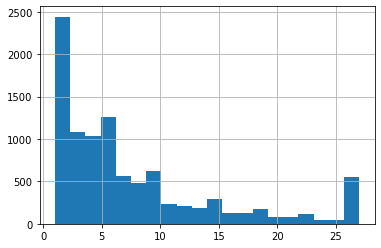

In [390]:
df.loss.hist(bins=20)

### Normalize target variable

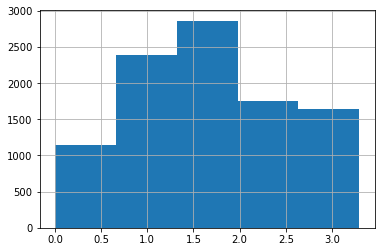

In [391]:
np.log(df.loss).hist(bins=5)

In [392]:
df["ln_loss"]=np.log(df.loss)

In [393]:
df=df.drop("loss",axis=1)


In [405]:
df1=df.corrwith(df.ln_loss).abs()
df1

f10        0.084006
f105       0.188713
f106       0.188713
f107       0.188713
f108       0.188713
             ...   
f95        0.202988
f96        0.202988
f97        0.202988
f98        0.202988
ln_loss    1.000000
Length: 482, dtype: float64

In [406]:
df2=df1[df1>.25]
len(df2)

26

In [407]:
df2

f13        0.341150
f142       0.265183
f25        0.307362
f26        0.264618
f281       0.409521
f282       0.387921
f283       0.290152
f31        0.269635
f333       0.253177
f376       0.288766
f377       0.308565
f400       0.372479
f424       0.282139
f442       0.266458
f443       0.291744
f516       0.269781
f517       0.290727
f596       0.333473
f597       0.385956
f598       0.325613
f599       0.385956
f67        0.362781
f670       0.331724
f675       0.374338
f68        0.375778
ln_loss    1.000000
dtype: float64

In [408]:
df2=df2.to_frame()

In [409]:
df2=df[df2.index]

In [410]:
# df2=df[df2.index]
# df2=df2.drop(["f13","f25"],axis=1)

### Base model without feature selection

In [411]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
train, test = train_test_split(df2, test_size = 0.3, random_state =124)
formula = 'ln_loss' + '~' + '+'.join(df2.columns.difference(["ln_loss"]))

In [412]:
base = smf.ols(formula , data = df2)
base = base.fit()
print(base.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_loss   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     252.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:26:35   Log-Likelihood:                -10941.
No. Observations:                9783   AIC:                         2.193e+04
Df Residuals:                    9758   BIC:                         2.211e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4977      0.176      8.508      0.0

In [413]:
test_pred = np.exp(base.predict(test))
train_pred = np.exp(base.predict(train))
train_y = np.exp(train.ln_loss)
test_y = np.exp(test.ln_loss)

In [414]:
#Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('Train_MAPE=', MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('Train_RMSE=',RMSE_train)
RMSPE_train =np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('Train_RMSPE=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('Train_Corr=',corr_train)

Train_MAPE= 0.7093327743859796
Train_RMSE= 6.088739702605818
Train_RMSPE= 1.1592830117781534
Train_Corr= 0.5607805088496328


In [415]:
#Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.7221662018026442
Test_RMSE= 6.08823038071127
Test_RMSPE= 1.1837088203684336
Test_Corr= 0.5511011436513645


### Feature selection

In [416]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression,f_oneway
X = df2[df2.columns.difference(["ln_loss"])]
Y= df2["ln_loss"]

In [418]:
F_values, p_values  = f_regression(X,Y )
f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg_results.columns = ['Feature', 'F_Value', 'P_Value']
f_reg_results.sort_values('F_Value', ascending=False, inplace=True)
v1=f_reg_results.head(10)
v1

,Feature,F_Value,P_Value
4,f281,1970.878200,0.000000e+00
5,f282,1732.595070,0.000000e+00
20,f599,1712.023456,0.000000e+00
18,f597,1712.023456,0.000000e+00
24,f68,1608.267303,0.000000e+00
23,f675,1593.961004,4.940656e-323
11,f400,1575.626819,1.281507e-319
21,f67,1482.368477,4.288900e-302
0,f13,1288.277325,3.780093e-265
17,f596,1223.781852,9.968445e-253


In [419]:
RFE_model = RFE(LinearRegression(), n_features_to_select=10)
RFE_model= RFE_model.fit(X, Y)
RFE_model.get_support()
RFE_selected_Cols = X.columns[list(RFE_model.get_support())]
RFE_selected_Cols=pd.DataFrame(RFE_selected_Cols)
RFE_selected_Cols.columns=["Feature"]
v2=RFE_selected_Cols
v2

,Feature
0,f282
1,f283
2,f400
3,f442
4,f443
5,f516
6,f517
7,f596
8,f597
9,f599


In [420]:
selectkbest = SelectKBest(f_oneway, k=10)
selectkbest = selectkbest.fit(X,Y)
selectkbest.get_support()
selectKbest_Cols = X.columns[list(selectkbest.get_support())]
selectKbest_Cols=pd.DataFrame(selectKbest_Cols)
selectKbest_Cols.columns=["Feature"]
v3=selectKbest_Cols
v3

,Feature
0,f13
1,f25
2,f26
3,f31
4,f376
5,f377
6,f442
7,f516
8,f599
9,f68


In [421]:
q1=v1.Feature.append(v2.Feature).drop_duplicates()
q1=pd.DataFrame(q1)
len(q1)

15

In [422]:
q2=q1.Feature.append(v3.Feature)
q2=pd.DataFrame(q2)
len(q2)

25

In [423]:
q2

,Feature
4,f281
5,f282
20,f599
18,f597
24,f68
23,f675
11,f400
21,f67
0,f13
17,f596


In [424]:
X2=df2[q2.Feature]
X2

,f281,f282,f599,f597,f68,f675,f400,f67,f13,f596,...,f13,f25,f26,f31,f376,f377,f442,f516,f599,f68
7,4.69,2.83,6,6,6,2.0,2,4.9649,6,2.845,...,6,75,1219708.0,98.0,58.96,70.15,5.0350,6.875,6,6
16,6.19,6.16,14,14,14,6.0,6,11.5710,14,8.700,...,14,77,1433250.0,105.0,71.60,74.63,5.6300,5.400,14,14
26,7.15,10.20,14,14,14,11.0,11,11.1023,14,8.120,...,14,40,934636.0,82.0,53.01,42.71,7.2150,5.945,14,14
50,3.50,3.01,13,13,13,3.0,3,10.7051,13,6.830,...,13,66,1254528.0,99.0,66.38,66.09,4.6200,5.350,13,13
64,6.75,9.31,15,15,15,10.0,10,11.9375,15,8.700,...,15,38,983488.0,88.0,45.13,39.97,5.3250,5.585,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105424,3.10,3.08,6,6,8,3.0,3,6.4775,8,3.215,...,8,77,1494388.0,106.0,74.53,76.54,3.8500,4.590,6,8
105430,2.99,1.42,6,6,7,1.0,1,6.1784,7,2.305,...,7,94,1383732.0,102.0,90.86,93.53,6.5550,4.625,6,7
105440,5.43,5.08,13,13,13,5.0,5,10.1420,13,8.100,...,13,51,968688.0,93.0,54.19,53.08,4.8750,6.385,13,13
105456,2.75,2.92,6,6,6,3.0,3,4.7010,6,2.695,...,6,66,1032608.0,92.0,65.00,66.04,5.2250,3.620,6,6


In [430]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIF_results = pd.concat([pd.Series(X2.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Feature', 'VIF']
VIF_results.sort_values('VIF', ascending=True, inplace=True)
VIF_results.round().head(10)

C:\Users\91954\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
9,f596,71.0
7,f67,72.0
17,f26,122.0
0,f281,152.0
18,f31,213.0
19,f376,385.0
5,f675,469.0
6,f400,1554.0
1,f282,1747.0
14,f517,3030.0


In [431]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size = 0.3, random_state =123)

In [450]:
formula = 'ln_loss' + '~' + 'f596+f67+f31+f376+f675+f400+f282+f517+f443+f597+f596+f442+f675+f598'

In [451]:
model = smf.ols(formula , data = train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_loss   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     322.3
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:42:13   Log-Likelihood:                -7815.4
No. Observations:                6848   AIC:                         1.566e+04
Df Residuals:                    6835   BIC:                         1.575e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4244      0.146      9.768      0.0

Linear eqn = coeff*intercept+coeff*features

In [453]:
test_pred = np.exp(model.predict(test))
train_pred = np.exp(model.predict(train))
train_y = np.exp(train.ln_loss)
test_y = np.exp(test.ln_loss)

### Model validation

In [454]:
#Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('Train_MAPE=', MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('Train_RMSE=',RMSE_train)
RMSPE_train =np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('Train_RMSPE=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('Train_Corr=',corr_train)


Train_MAPE= 0.7398295655901554
Train_RMSE= 6.250267804827075
Train_RMSPE= 1.224340028091024
Train_Corr= 0.5388862652751732


In [455]:
#Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.726652495389648
Test_RMSE= 5.8755148167081765
Test_RMSPE= 1.180675542746682
Test_Corr= 0.5673749277906674


####  Decile analysis

In [458]:
train_new = pd.concat([train_y, train_pred], axis=1)
train_new.columns = ['actual', 'pred']
test_new = pd.concat([test_y, test_pred], axis=1)
test_new.columns = ['actual', 'pred']

In [462]:
train_new['Deciles'] = pd.qcut(train_new.pred, 10, labels=False)
train_new1=train_new.groupby('Deciles').mean()
train_new1

,actual,pred
Deciles,,
0,2.687591,2.025174
1,3.583942,2.750159
2,4.375182,3.306002
3,5.165205,3.861526
4,6.287591,4.500446
5,7.084672,5.234186
6,8.646199,6.159295
7,10.240876,7.403405
8,12.531387,9.366025


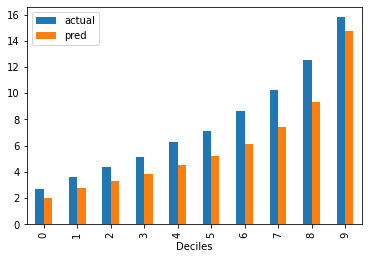

In [468]:
train_new1.plot.bar()

In [464]:
test_new['Deciles'] = pd.qcut(test_new.pred, 10, labels=False)
test_new1=test_new.groupby('Deciles').mean()
test_new1

,actual,pred
Deciles,,
0,2.585034,2.039657
1,3.453925,2.720104
2,4.408163,3.286320
3,5.044369,3.849316
4,6.394558,4.527642
5,6.839590,5.274664
6,8.726962,6.116469
7,8.979592,7.343811
8,11.979522,9.290878


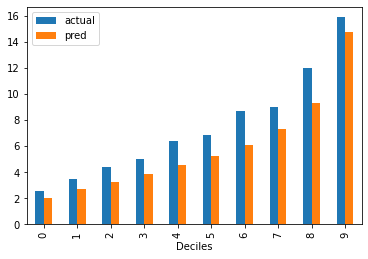

In [469]:
test_new1.plot.bar()

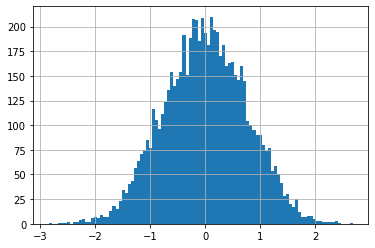

In [461]:
model.resid.hist(bins=100)

In [270]:
np.corrcoef(train_y, train_pred)

array([[1.        , 0.56955117],
       [0.56955117, 1.        ]])

In [271]:
np.corrcoef(train_y, model.resid)

array([[1.        , 0.67627855],
       [0.67627855, 1.        ]])

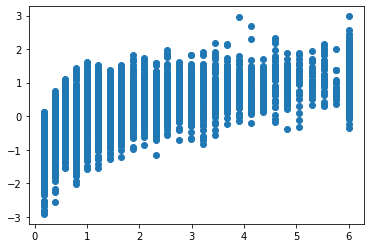

In [272]:
plt.scatter(train_y, model.resid)

#### This model can be deployed on defaulter dataset to predict severity of losses

In [ ]:
defaulter_data["loss"]=np.exp(model.predict(defaulter_data))